In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.nn.functional as F
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
import pdb

from utils import *

In [10]:
CH = 'all'
device = torch.device('cuda')
val_dates = ['180409','180412','180414']
test_dates = ['180411', '180413']
#load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
# save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_2_upsample'
save_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/Goose_ANN_models/'
model_name = 'MLP_all_ch'

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=128)

In [11]:
len(train_loader), len(val_loader), len(test_loader)

(416, 52, 48)

In [12]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 10])
torch.Size([128, 1])
128
128
128


date:180324, rec:003, time:3517.0, label:1.0
date:180327, rec:008, time:140.0, label:0.0


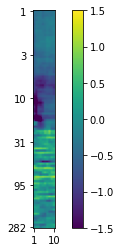

date:180325, rec:003, time:4593.0, label:0.0


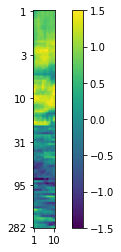

date:180331, rec:007, time:5658.0, label:0.0


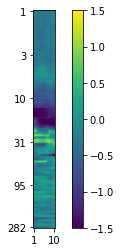

date:180327, rec:007, time:5711.0, label:0.0


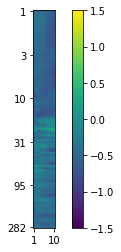

date:180331, rec:004, time:5287.0, label:1.0
date:180330, rec:003, time:4612.0, label:1.0
date:180325, rec:007, time:5903.0, label:0.0


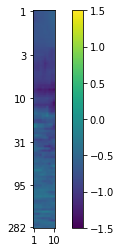

date:180331, rec:007, time:5137.0, label:0.0


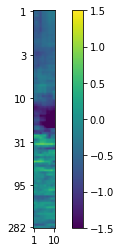

date:180410, rec:006, time:4769.0, label:1.0
date:180329, rec:002, time:169.0, label:1.0
date:180401, rec:001, time:970.0, label:0.0


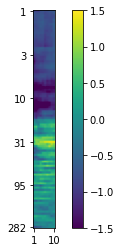

date:180331, rec:001, time:4525.0, label:1.0
date:180330, rec:001, time:2106.0, label:1.0
date:180327, rec:001, time:700.0, label:0.0


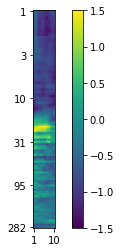

date:180410, rec:006, time:6042.0, label:0.0


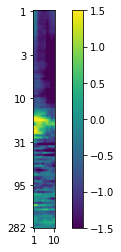

date:180324, rec:006, time:4528.0, label:1.0
date:180323, rec:007, time:3035.0, label:0.0


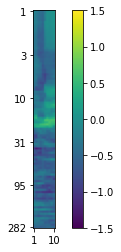

date:180330, rec:009, time:6911.0, label:0.0


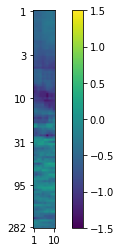

date:180327, rec:008, time:6349.0, label:1.0
date:180326, rec:004, time:5946.0, label:1.0
date:180327, rec:001, time:570.0, label:0.0


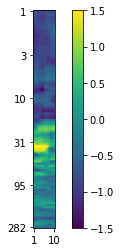

date:180331, rec:001, time:5717.0, label:1.0
date:180327, rec:007, time:3440.0, label:0.0


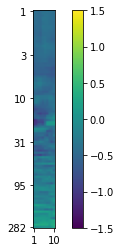

date:180410, rec:004, time:5029.0, label:1.0
date:180324, rec:008, time:611.0, label:1.0
date:180330, rec:008, time:391.0, label:0.0


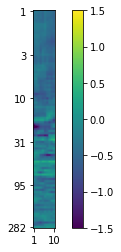

date:180330, rec:001, time:3262.0, label:1.0
date:180330, rec:008, time:3216.0, label:0.0


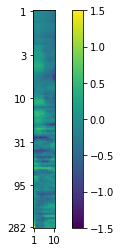

date:180327, rec:008, time:2842.0, label:0.0


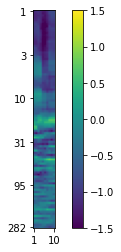

date:180327, rec:006, time:490.0, label:1.0
date:180331, rec:007, time:4157.0, label:0.0


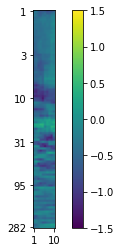

date:180410, rec:005, time:7059.0, label:1.0
date:180329, rec:002, time:1696.0, label:1.0
date:180331, rec:003, time:5898.0, label:1.0
date:180330, rec:008, time:4017.0, label:0.0


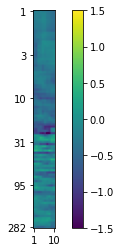

date:180327, rec:007, time:4050.0, label:0.0


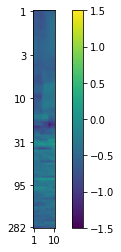

date:180327, rec:008, time:1512.0, label:0.0


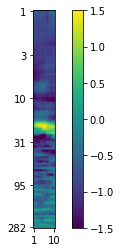

date:180331, rec:007, time:6048.0, label:0.0


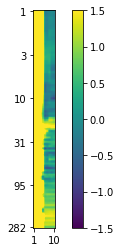

date:180324, rec:008, time:6824.0, label:0.0


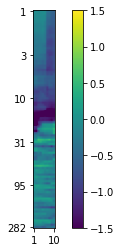

date:180410, rec:003, time:1081.0, label:1.0
date:180331, rec:001, time:3134.0, label:1.0
date:180325, rec:007, time:6973.0, label:0.0


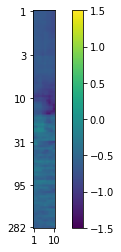

date:180331, rec:007, time:4337.0, label:0.0


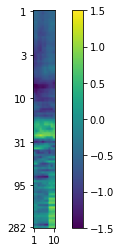

date:180325, rec:001, time:940.0, label:0.0


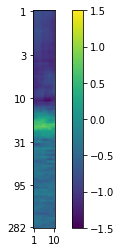

date:180327, rec:008, time:7009.0, label:1.0
date:180330, rec:006, time:2982.0, label:1.0
date:180401, rec:001, time:5427.0, label:0.0


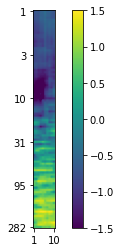

date:180327, rec:008, time:5283.0, label:0.0


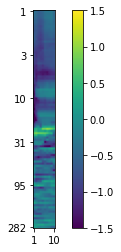

date:180325, rec:007, time:3455.0, label:0.0


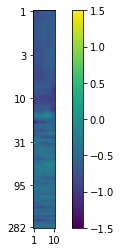

date:180401, rec:003, time:490.0, label:1.0
date:180327, rec:002, time:2020.0, label:1.0
date:180325, rec:004, time:270.0, label:1.0
date:180327, rec:008, time:2132.0, label:0.0


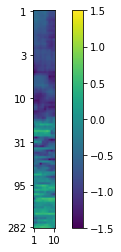

date:180324, rec:004, time:6963.0, label:1.0
date:180330, rec:008, time:1591.0, label:0.0


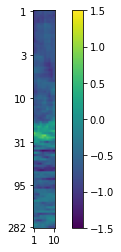

date:180331, rec:007, time:3577.0, label:0.0


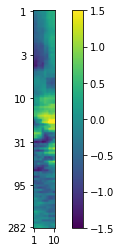

date:180327, rec:008, time:2072.0, label:0.0


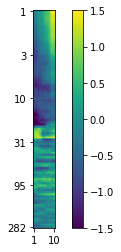

date:180325, rec:007, time:160.0, label:1.0
date:180329, rec:001, time:2409.0, label:0.0


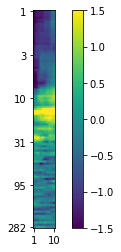

date:180324, rec:009, time:500.0, label:0.0


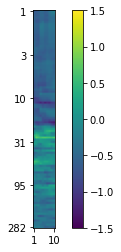

date:180323, rec:004, time:5469.0, label:1.0
date:180327, rec:007, time:3600.0, label:0.0


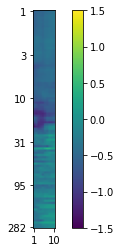

date:180410, rec:006, time:5942.0, label:0.0


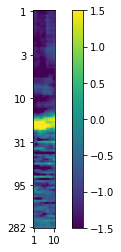

date:180324, rec:008, time:6094.0, label:0.0


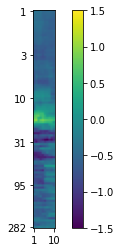

date:180323, rec:001, time:850.0, label:0.0


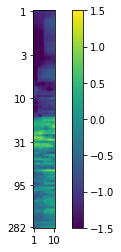

date:180327, rec:007, time:5741.0, label:0.0


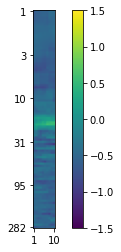

date:180330, rec:008, time:7015.0, label:0.0


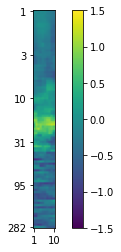

date:180330, rec:001, time:500.0, label:0.0


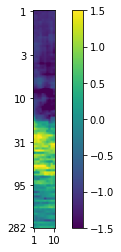

date:180401, rec:001, time:310.0, label:0.0


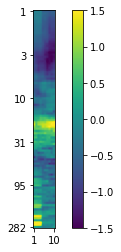

date:180323, rec:002, time:7018.0, label:1.0
date:180401, rec:001, time:2039.0, label:1.0
date:180325, rec:005, time:6053.0, label:1.0
date:180331, rec:004, time:5337.0, label:1.0
date:180330, rec:004, time:2027.0, label:1.0
date:180330, rec:006, time:4923.0, label:1.0
date:180331, rec:005, time:390.0, label:1.0
date:180322, rec:007, time:1647.0, label:0.0


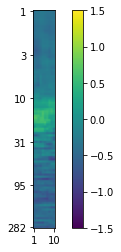

date:180410, rec:004, time:5663.0, label:1.0
date:180322, rec:004, time:4019.0, label:1.0
date:180331, rec:001, time:2922.0, label:1.0
date:180327, rec:007, time:5791.0, label:0.0


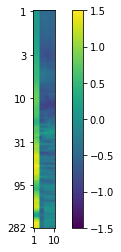

date:180327, rec:001, time:4361.0, label:1.0
date:180327, rec:008, time:5253.0, label:0.0


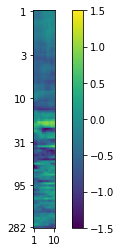

date:180325, rec:007, time:3982.0, label:0.0


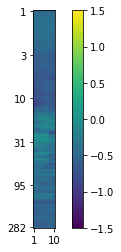

date:180331, rec:007, time:5988.0, label:0.0


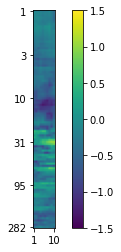

date:180410, rec:002, time:952.0, label:1.0
date:180331, rec:001, time:6327.0, label:1.0
date:180410, rec:005, time:4262.0, label:1.0
date:180322, rec:005, time:2711.0, label:1.0
date:180401, rec:001, time:6613.0, label:1.0
date:180401, rec:003, time:300.0, label:1.0
date:180323, rec:002, time:2556.0, label:1.0
date:180324, rec:004, time:4629.0, label:1.0
date:180327, rec:007, time:3510.0, label:0.0


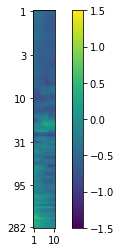

date:180330, rec:003, time:4214.0, label:1.0
date:180330, rec:009, time:4351.0, label:0.0


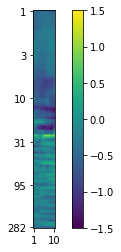

date:180330, rec:007, time:6418.0, label:1.0
date:180329, rec:006, time:4757.0, label:0.0


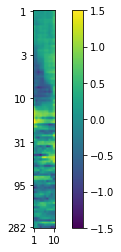

date:180410, rec:006, time:6352.0, label:0.0


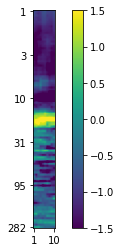

date:180401, rec:001, time:1420.0, label:0.0


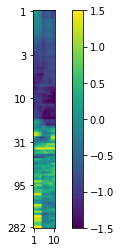

date:180326, rec:003, time:3679.0, label:1.0
date:180327, rec:007, time:3310.0, label:0.0


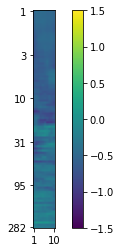

date:180323, rec:007, time:5234.0, label:0.0


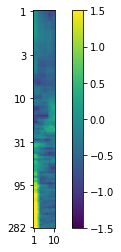

date:180329, rec:001, time:910.0, label:0.0


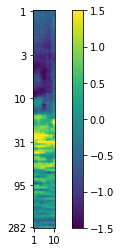

date:180325, rec:009, time:6772.0, label:1.0
date:180323, rec:007, time:5671.0, label:0.0


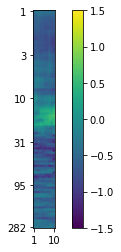

date:180401, rec:001, time:1330.0, label:0.0


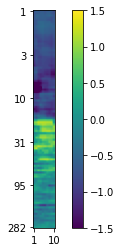

date:180327, rec:008, time:6529.0, label:1.0
date:180325, rec:001, time:1760.0, label:0.0


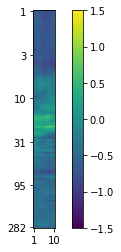

date:180325, rec:006, time:6726.0, label:1.0
date:180331, rec:005, time:6648.0, label:1.0
date:180410, rec:002, time:962.0, label:1.0
date:180331, rec:004, time:3774.0, label:1.0
date:180324, rec:008, time:2778.0, label:0.0


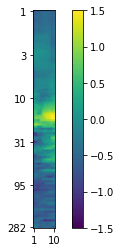

date:180325, rec:005, time:724.0, label:1.0
date:180325, rec:007, time:2193.0, label:1.0
date:180323, rec:003, time:3291.0, label:1.0
date:180325, rec:002, time:410.0, label:1.0
date:180331, rec:007, time:3147.0, label:0.0


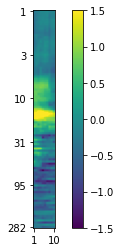

date:180322, rec:007, time:2283.0, label:0.0


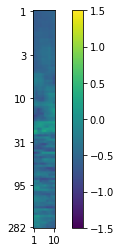

date:180330, rec:008, time:271.0, label:0.0


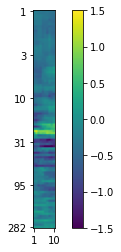

date:180331, rec:005, time:959.0, label:1.0
date:180329, rec:001, time:1664.0, label:0.0


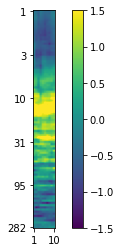

date:180323, rec:007, time:4782.0, label:0.0


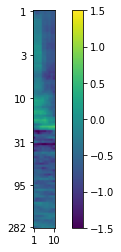

date:180322, rec:007, time:3960.0, label:0.0


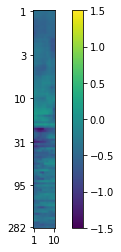

date:180331, rec:004, time:6007.0, label:1.0
date:180325, rec:009, time:2926.0, label:1.0


In [13]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

In [14]:
class MLP(nn.Module): # add dropo
    def __init__(self, input_dim=100*10*62, output_dim=1, embed_dim=256,drop_prob=0.):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, embed_dim)
        self.linear2 = nn.Linear(embed_dim, output_dim)
        self.dropout = nn.Dropout(drop_prob)
        
    def forward(self, x):
        
        x = x.reshape([x.shape[0], 1, -1]).float()
        x = self.dropout(F.relu(self.linear1(x)))
        outputs = self.linear2(x)
        
        return outputs

In [ ]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'MLP'
loss_type = 'bce'
reg_type = 'none'
embed_dim = 256

input_dim = 100*10*62
p = 0.


model = MLP(input_dim=input_dim, embed_dim=embed_dim,drop_prob = p).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
model

In [ ]:
(data, labels, _, _, _) = next(iter(train_loader))
data = data.to(device)
output = model(data)
output.shape

In [ ]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                  reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                 reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
                save_path, model_type, CH, loss_type, reg_type, alpha, embed_dim, epoch,model_name))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)

    if train_loss < tol:
        break

In [ ]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # embed_dim=64

In [ ]:
model = MLP(input_dim=input_dim, embed_dim=embed_dim).to(device)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
    save_path, model_type, CH, loss_type, reg_type, alpha, embed_dim, best_epoch,model_name)))

In [ ]:
w1 = model.linear1.weight
w1.shape

In [ ]:
w1 = model.linear1.weight.view(256,62,10,100)
w2 = model.linear2.weight
print(w1.shape, w2.shape)
w1 = w1.detach().cpu().numpy()
w2 = w2.detach().cpu().numpy()
w1[0][0].shape

In [ ]:
plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
plt.xticks(ticks=[0, 9], labels=[1, 10])
plt.imshow(w1[0][0].transpose(),origin='lower')
# plt.clim(-1.5, 1.5)
plt.colorbar()
plt.show()

In [ ]:
timewindow = 10
plt.figure(figsize=(20,20))
ylabels_list = [0,32,64,96,128,160,192,224,256] 
for i in range(256):
    weights_sub = w1[i]
    plt.subplot(8,32,i+1)
    if i in ylabels_list:
        plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
        plt.xticks(ticks=[0, timewindow-1], labels=[1, timewindow])
    else:
        plt.axis('off')
#     plt.imshow(weights_sub)
    plt.imshow(w1[i][0].transpose(),origin='lower')
    plt.title(str(i+1))
plt.show()

In [ ]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

In [ ]:
plot_confusion(test_preds, test_labels)